In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
#from matplotlib import rcParams  # special matplotlib argument for improved plots
import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("poster")

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
#import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # Warnings are checked during testing the codes and importing this for the final report

# 1. Preprocessing data

## 1.1 Examing the data

In [2]:
df = pd.read_csv('PccProject[1][1][1].csv')

print('Total number of columns is {}.'.format(len(df.columns)))
print('Total number of rows is {}.'.format(len(df)))
print('Total number of hit is {}.'.format(df.pcc.sum()))

df.head()

Total number of columns is 39.
Total number of rows is 7989.
Total number of hit is 24.


,ad_exchange,req_datetime,req_ad_id,imp_width,imp_height,imp_btype,preference,category,device_os,lat,lon,device_country,device_state,zip,mobile_screen_width,mobile_screen_height,position,gender,user_keyword,user_age,view_count,creative_type,imp_btype_bin,lat_bin,device_country_bin,device_state_bin,zip_bin,category_count,badv_count,bcat_count,req_day,req_hour,pcc,gender_bin,preference_bin,user_age_bin,user_keyword_bin,device_ios_bin,device_android_bin
0,Mopub,6/11/2013 13:50,1f60f4f2-6c0d-4826-a2b6-1dd27eff1e1b,320,50,NaN,app,IAB14|IAB24|lifestyle|social_networking,Android,33.45,-112.07,USA,AZ,85001,NaN,NaN,NaN,NaN,NaN,NaN,0,Banner,1,1,1,1,1,0,14,5,2,13,0,0,0,0,0,0,1
1,Mopub,6/11/2013 14:07,37aef7d7-295a-424d-be27-7faaed517269,728,90,NaN,app,IAB9|IAB9-30|games,Android,33.67,-112.11,USA,AZ,85001,NaN,NaN,NaN,NaN,NaN,NaN,0,Banner,1,1,1,1,1,0,0,5,2,14,0,0,0,0,0,0,1
2,Mopub,6/11/2013 15:08,dfbb2720-35e7-4e27-9906-b95a3f74a726,320,50,NaN,app,IAB14|IAB24|lifestyle|social_networking,Android,33.45,-112.07,USA,AZ,85250,NaN,NaN,NaN,NaN,NaN,NaN,0,Banner,1,1,1,1,1,0,14,5,2,15,0,0,0,0,0,0,1
3,Mopub,6/11/2013 16:35,823363eb-318d-4747-9c24-362d44671524,320,50,NaN,app,IAB14|IAB24|lifestyle|social_networking,Android,33.45,-112.07,USA,AZ,85345,NaN,NaN,NaN,NaN,NaN,NaN,0,Banner,1,1,1,1,1,0,14,5,2,16,0,0,0,0,0,0,1
4,Mopub,6/11/2013 17:27,37ad121b-b03d-48d7-98d9-8be3c9fada21,320,50,NaN,app,IAB14|IAB24|lifestyle|social_networking,Android,44.77,-94.15,USA,MN,55350,NaN,NaN,NaN,NaN,NaN,NaN,0,Banner,1,1,1,1,1,0,14,5,2,17,0,0,0,0,0,0,1


In [3]:
i = 0
df_dscp = []
while i < len(df.columns):
    c_dscp = []
    c_dscp.append(list(df)[i]) 
    c_dscp.append(df[list(df)[i]].dtype) 
    c_dscp.append(len(pd.unique(df[list(df)[i]])))
    df_dscp.append(c_dscp)
    i += 1
    
df_dscp = pd.DataFrame(df_dscp, columns=['column_name', 'data_type', 'num_unique_value'])

df_dscp

,column_name,data_type,num_unique_value
0,ad_exchange,object,6
1,req_datetime,object,4852
2,req_ad_id,object,7989
3,imp_width,int64,3
4,imp_height,int64,3
5,imp_btype,object,8
6,preference,object,4
7,category,object,103
8,device_os,object,3
9,lat,float64,851


###  NaN columns

Given I saw many columns with NaN, I'll inspect the NaN counts in each column

In [4]:
print('The total number of "NaN" records in each column: \n{}'.format(pd.isnull(df).sum()))

The total number of "NaN" records in each column: 
ad_exchange                0
req_datetime               0
req_ad_id                  0
imp_width                  0
imp_height                 0
imp_btype               6870
preference                 0
category                 282
device_os                  0
lat                     1600
lon                     1600
device_country             0
device_state              20
zip                        0
mobile_screen_width     7982
mobile_screen_height    7982
position                6945
gender                  6692
user_keyword            7989
user_age                7603
view_count                 0
creative_type              0
imp_btype_bin              0
lat_bin                    0
device_country_bin         0
device_state_bin           0
zip_bin                    0
category_count             0
badv_count                 0
bcat_count                 0
req_day                    0
req_hour                   0
pcc                  

### Notice:
1. All the records in 'user_keyword' is 'NaN', thus this column should be droped.
2. 'mobile_screen_width' and 'mobile_screen_height' has the same number of 'NaN'. Test weather they are correlated with each other.
3. 'mobile_screen_width','mobile_screen_height','user_age','user_keyword','position','imp_btype' and 'gender'have large number of 'NaN' values. Test whether they have predicting powder. 


In [5]:
print('The Peason correlation between "mobile_screen_width" and "mobile_screen_height" is {}'.format(df['mobile_screen_width'].corr(df['mobile_screen_height'])))

df.fillna("No Info").groupby(['mobile_screen_width'])['pcc'].sum().reset_index()

The Peason correlation between "mobile_screen_width" and "mobile_screen_height" is 1.0


,mobile_screen_width,pcc
0,240,0
1,320,0
2,No Info,24


#### Both 'mobile_screen_width' and 'mobile_screen_height' are correlated with each other and do not contribute to predict 'pcc', thus both should be removed.

In [6]:
df.fillna("No Info").groupby(['user_age'])['pcc'].sum().reset_index()

,user_age,pcc
0,0,0
1,9,0
2,10,0
3,11,0
4,12,0
5,13,0
6,14,0
7,15,0
8,16,0
9,17,0


#### 'user_age' will not contribute to predict 'pcc' and it should be removed. Same as 'user_age_bin'

In [7]:
print(df.fillna("No Info").groupby(['position'])['pcc'].sum().reset_index())
print(df.fillna("No Info").groupby(['position'])['ad_exchange'].count().reset_index())

  position  pcc
0        0    0
1        2    0
2        4    1
3  No Info   23
4    above    0
5     none    0
  position  ad_exchange
0        0           17
1        2            3
2        4         1017
3  No Info         6945
4    above            1
5     none            6


#### Give 1/1017 << 23/6945 and 'position' column contains large number of 'NaN',  'position' will be removed.

In [8]:
df.fillna("No Info").groupby(['gender'])['pcc'].sum().reset_index()

,gender,pcc
0,F,0
1,M,0
2,No Info,24
3,f,0
4,female,0
5,m,0


#### 'gender' does not contribute to predict 'pcc' and it should be removed. Same as 'gender_bin' column which encodes 'gender' column.

In [9]:
df.fillna("No Info").groupby(['imp_btype'])['pcc'].sum().reset_index()

,imp_btype,pcc
0,1,0
1,1|3,0
2,1|3|4,0
3,1|4,1
4,3,0
5,3|4,0
6,4,1
7,No Info,22


#### 'imp_btype' will be kept for the moment.

In [10]:
df = df.drop(['mobile_screen_width','mobile_screen_height','user_age','user_age_bin','user_keyword', 'position','gender', 'gender_bin'], 1)

### Columns are not informative

In [11]:
i = 0
df_dscp = []
while i < len(df.columns):
    c_dscp = []
    c_dscp.append(list(df)[i]) 
    c_dscp.append(df[list(df)[i]].dtype) 
    c_dscp.append(len(pd.unique(df[list(df)[i]])))
    df_dscp.append(c_dscp)
    i += 1
    
df_dscp = pd.DataFrame(df_dscp, columns=['column_name', 'data_type', 'num_unique_value'])

df_dscp

,column_name,data_type,num_unique_value
0,ad_exchange,object,6
1,req_datetime,object,4852
2,req_ad_id,object,7989
3,imp_width,int64,3
4,imp_height,int64,3
5,imp_btype,object,8
6,preference,object,4
7,category,object,103
8,device_os,object,3
9,lat,float64,851


1. 'req_ad_id' contains 7989 unique values that are not informative for prediction and should be removed.
2. 'creative_type', 'imp_btype_bin', 'device_country_bin', 'device_state_bin', 'zip_bin' and 'user_keyword_bin' columns have only 1 unique value, thus all should be removed.
3. 'lat' and 'lon' can be useful together with the 'req_datetime' to query the weather of the day. But for the simplisity in here, I'll drop those two columns as well as the 'lat_bin', which encodes whether 'lat' and 'lon' exsited or not.
4. 'device_state' and 'zip' can encode audience's background, however, I'm not going to condiser that for the model simplisity as well as the small number of records in the dataset (those columns will dramatically increase the dimensions of features if they are considered here.)

In [12]:
df = df.drop(['req_ad_id', 'creative_type', 'imp_btype_bin', 'device_country_bin', 
              'device_state_bin', 'zip_bin', 'user_keyword_bin', 'lat', 'lon', 'lat_bin', 
              'device_state', 'zip' ], 1)

In [13]:
i = 0
df_dscp = []
while i < len(df.columns):
    c_dscp = []
    c_dscp.append(list(df)[i]) 
    c_dscp.append(df[list(df)[i]].dtype) 
    c_dscp.append(len(pd.unique(df[list(df)[i]])))
    df_dscp.append(c_dscp)
    i += 1
    
df_dscp = pd.DataFrame(df_dscp, columns=['column_name', 'data_type', 'num_unique_value'])

df_dscp

,column_name,data_type,num_unique_value
0,ad_exchange,object,6
1,req_datetime,object,4852
2,imp_width,int64,3
3,imp_height,int64,3
4,imp_btype,object,8
5,preference,object,4
6,category,object,103
7,device_os,object,3
8,device_country,object,2
9,view_count,int64,5


### Check the unique values in catogorical columns

In [14]:
for index, row in df_dscp.iterrows():
    if row[1] == 'object':
        print(row[0] + ':')
        print(pd.unique(df[row['column_name']])) 

ad_exchange:
['Mopub' 'NexAge' 'AdMeld' 'Smaato' 'MoPub' 'Nexage']
req_datetime:
['6/11/2013 13:50' '6/11/2013 14:07' '6/11/2013 15:08' ...,
 '7/28/2013 11:57' '7/28/2013 12:14' '7/28/2013 12:57']
imp_btype:
[nan '1|4' '4' '1' '3|4' '1|3' '3' '1|3|4']
preference:
['app' 'site' 'APP' 'SITE']
category:
['IAB14|IAB24|lifestyle|social_networking' 'IAB9|IAB9-30|games'
 'IAB1|IAB1-6|IAB9|IAB9-30|games|music'
 'IAB24|IAB3|productivity|social_networking'
 'IAB1|IAB24|entertainment|social_networking' 'Society'
 'IAB24|IAB3|social_networking|utilities' 'IAB1|entertainment'
 'IAB1|IAB9|IAB9-30|entertainment|games'
 'Internet|Internet : UGC|Internet : UGC : Social Networks|Quality|17163|12677|Quality : AdStats AdCount|Quality : AdStats AdCount : Low 1-3|Quality : AdStats ATF Index High|15827|7072|Custom Category : Oil Industry Safe|12694|Safe from Drugs|Safe from Gambling|Safe from Mature|Safe from Profanity and Hate Speech|Safe from Torrent|Safe from Alcohol|Safe from Negative News|Quality : Free

1. Columns that different categorical descriptions should be the same thing:
    1. 'ad_exchange': 'NexAge' and 'Nexage', 'Mopub' and 'MoPub'
    2. 'preference': 'app' and 'APP'; 'site' and 'SITE'
    3. 'device_os': 'iOS' and 'iPhone OS'
    4. 'device_country':'USA' and 'US' ( I should remove this column since it has essentially only one unique catogory)
2. 'category': seems to be combination of features of each ad, I can potentially seperate these descriptions and create new features with it.

In [15]:
df.ad_exchange[df.ad_exchange == 'Nexage'] = 'NexAge' 
df.ad_exchange[df.ad_exchange == 'Mopub'] = 'MoPub' 

df.preference[df.preference == 'APP'] = 'app'
df.preference[df.preference == 'SITE'] = 'site'

df.device_os[df.device_os=='iPhone OS'] = 'iOS'

df= df.drop(['device_country'],1)

### 1.2 Seperate the Ad requesting time into timespans

In [16]:
df['req_datetime'] = pd.to_datetime(df['req_datetime'])

In [ ]:
#df.groupby(df["req_datetime"].dt.hour)['req_datetime'].count().plot(kind="bar")

In [ ]:
#df.groupby(df["req_datetime"].dt.dayofweek)['req_datetime'].count().plot(kind="bar")

In [ ]:
#df.groupby(df["req_datetime"].dt.dayofweek)['pcc'].sum().plot(kind="bar")

#### I'll seperate the Ad requesting time first into weekday and weekend,  and then into BeforeWork (0:00~8:00), Worktime (8:00 ~ 16:00), and AfterWork (16:00~0:00) soly based on the Ad requesting time here. (More reasonable seperation should be based on the local time where the Ad audiance locates.)

In [17]:
df['dayofweek'] = df['req_datetime'].dt.dayofweek
df['hour'] = df["req_datetime"].dt.hour

In [18]:
df.loc[(df['dayofweek'] > 5), 'Day'] = 'Weekend'
df.loc[(df['dayofweek'] <= 4), 'Day'] = 'Weekday'

df.loc[df['hour'] < 8, 'Timespan'] = 'BeforeWork'
df.loc[df['hour'] > 16, 'Timespan'] = 'AfterWork'
df.loc[(df['hour'] >= 8) & (df['hour'] <= 16), 'Timespan'] = 'Worktime'

In [19]:
df = df.drop(['req_datetime', 'dayofweek', 'hour'], 1)

### 1.3 Eliminate highly correlated features

In [20]:
# Dummify the data
df1 = df.copy()
df1 = pd.get_dummies(df1)
corr = df1.corr()


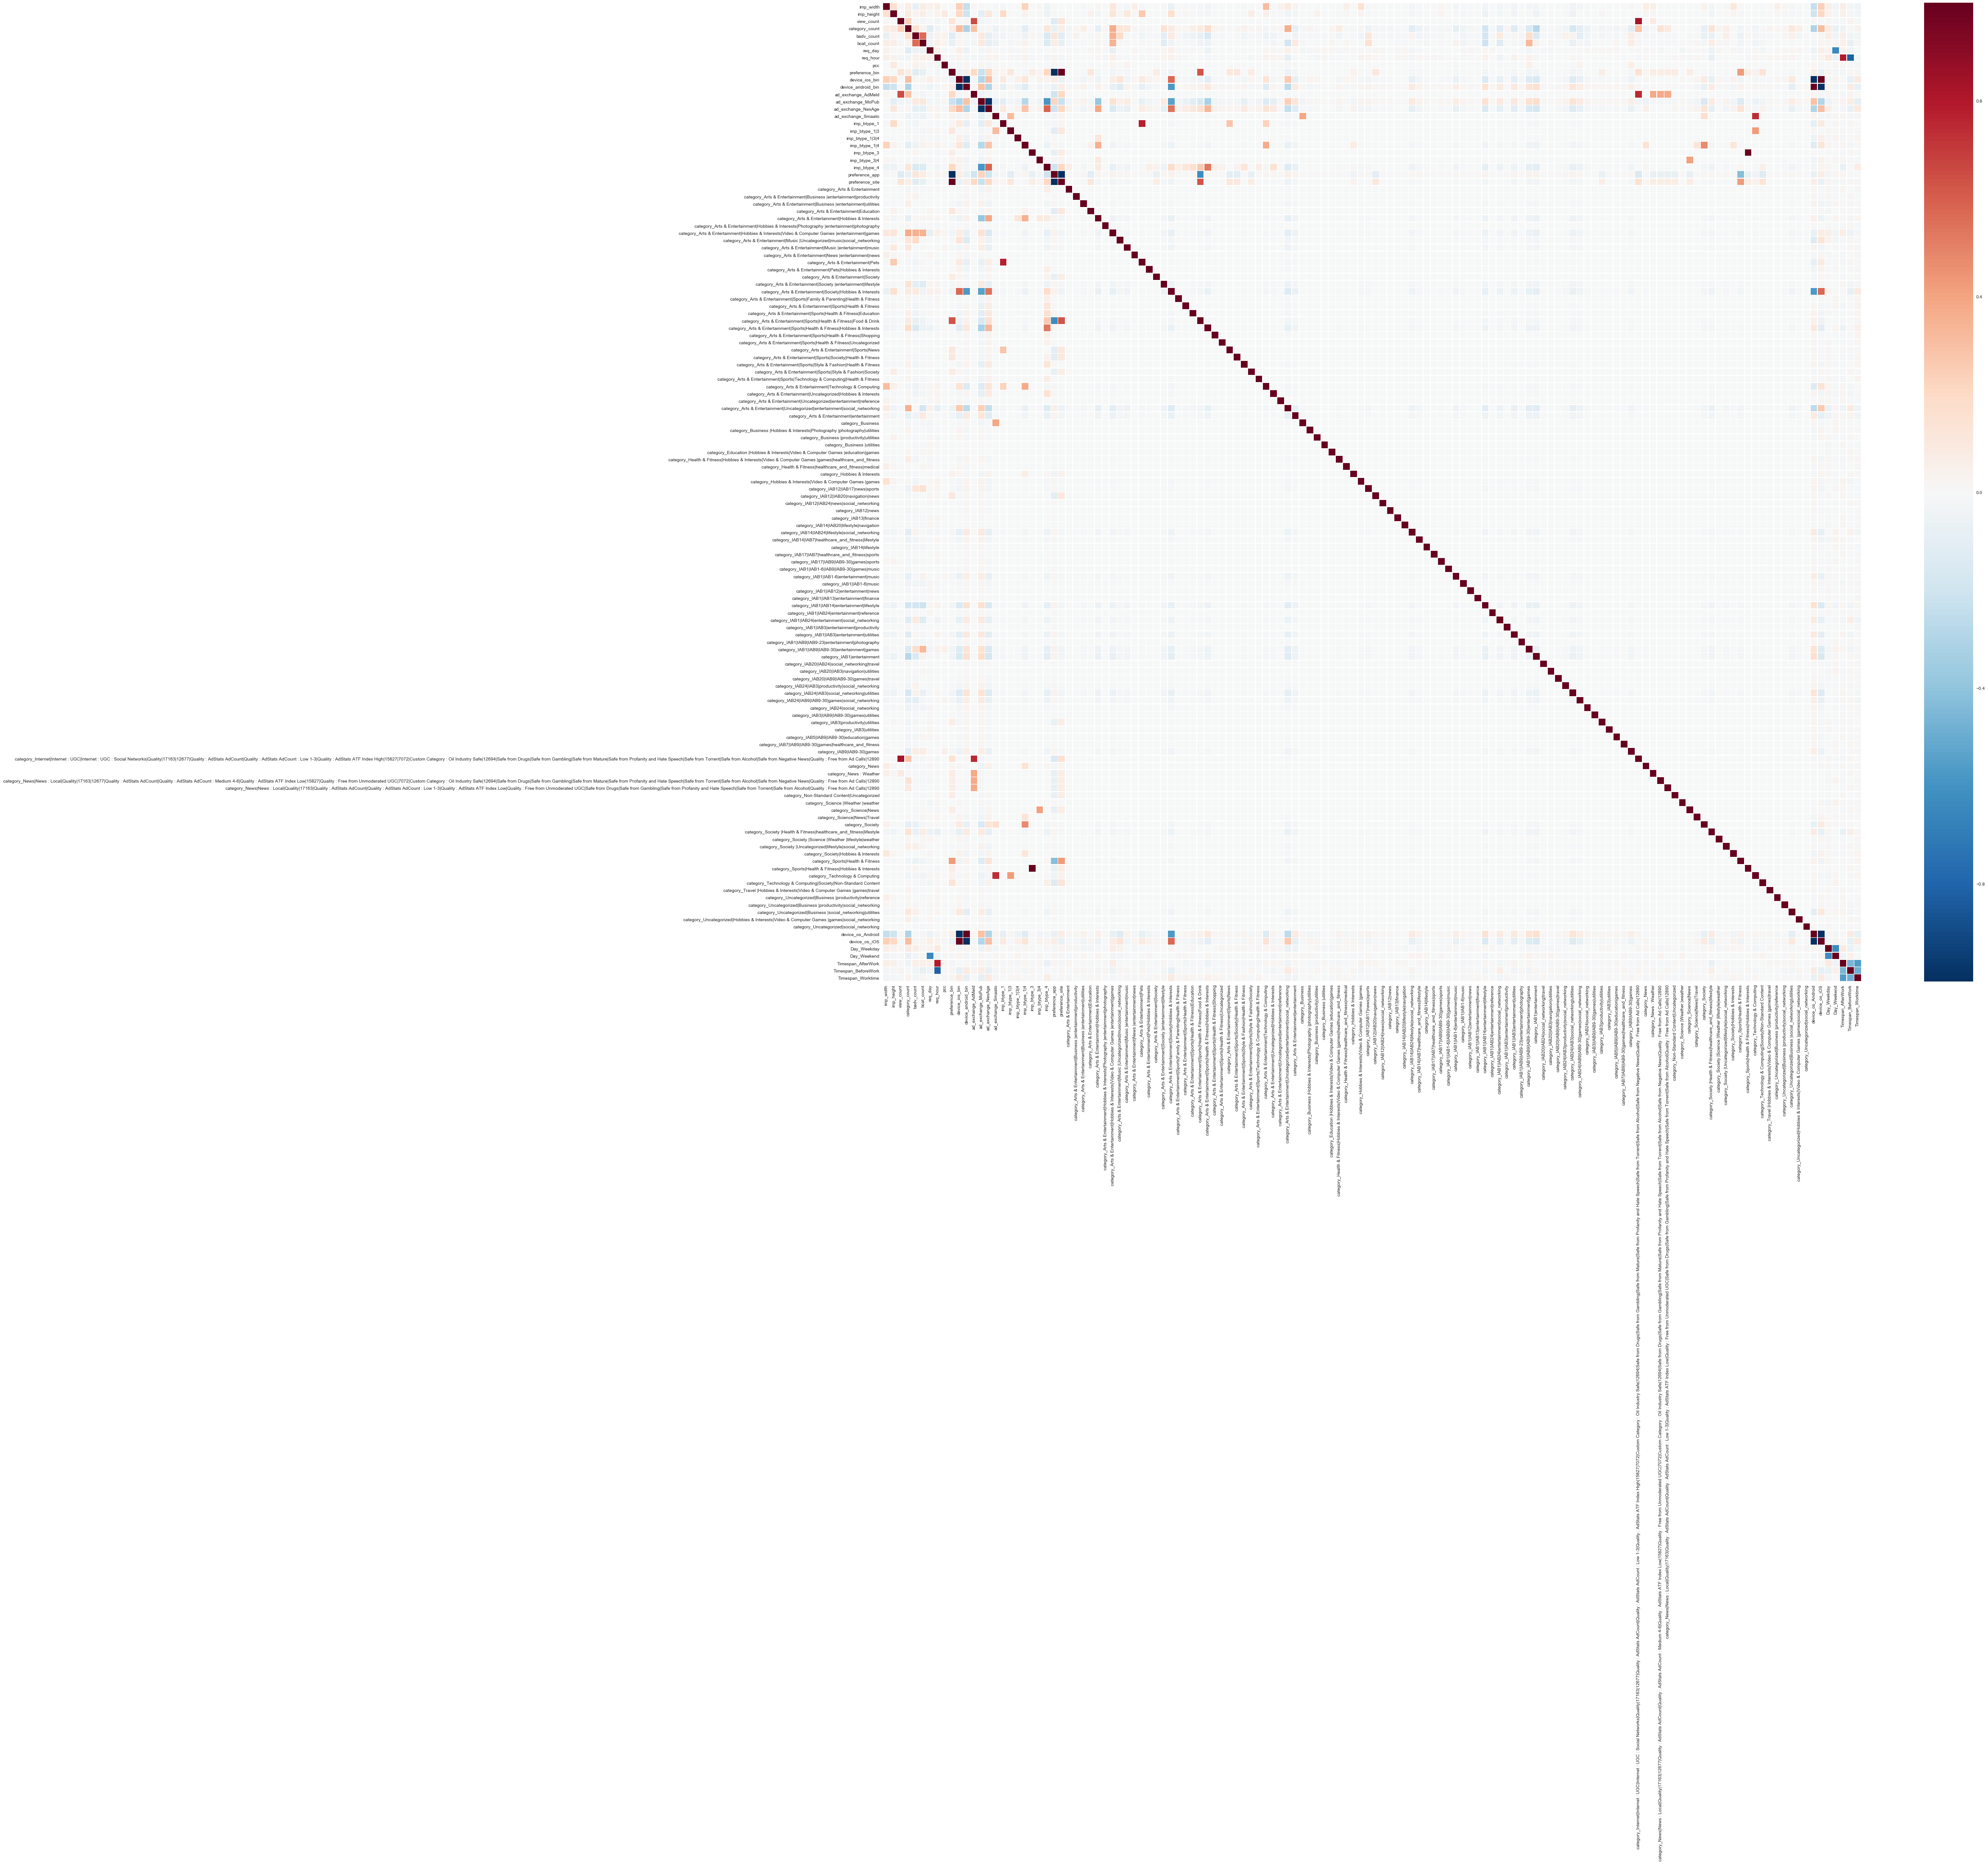

In [21]:
f, ax = plt.subplots(figsize=(50, 40))

sns.heatmap(corr, vmax=.3,
            square=True, linewidths=.5)

In [22]:
# Isolate the extreme colineality features
s = corr.abs().unstack().reset_index()
s.columns = ['first', 'second', 'correlation']
so = s.sort_values('correlation')
so = so[(so.correlation > 0.8)].reset_index()
#result = pd.DataFrame(columns=['first', 'second', 'correlation'])
result = []
for index, row in so.iterrows():
    if row['first'] ==row['second']:
        pass
    else:
        result.append(row)
result = pd.DataFrame(result).sort_values(['first'])
result

,index,first,second,correlation
1,17695,Timespan_BeforeWork,req_hour,0.815203
4,1756,ad_exchange_MoPub,ad_exchange_NexAge,0.991283
5,1889,ad_exchange_NexAge,ad_exchange_MoPub,0.991283
2,13804,category_Internet|Internet : UGC|Internet : UG...,view_count,0.828733
100,15832,category_Sports|Health & Fitness|Hobbies & Int...,imp_btype_3,1.000000
62,1484,device_android_bin,device_ios_bin,1.000000
81,1601,device_android_bin,device_os_Android,1.000000
65,1602,device_android_bin,device_os_iOS,1.000000
47,1468,device_ios_bin,device_os_iOS,1.000000
48,1467,device_ios_bin,device_os_Android,1.000000


1. 'preference' column generated two features 'preference_app' and 'preference_site' are extremely correlated with the 'preference_bin'. And it should be removed.
2. 'device_ios_bin' column is extremely correlated with 'device_os_Android', 'device_android_bin' and 'device_os_iOS', thus 'device_os' and 'device_android_bin' should be removed.
3. 'imp_btype_3' are extremely correlated with dummy vairable 'category_Sports|Health & Fitness|Hobbies & Int...' (generated from 'category'), seperately, and 'imp_btype_3' will be removed from the features.  
4. 'req_hour' is correlated with 'Timespan_BeforeWork' and it will be removed.

In [23]:
df = df.drop(['preference', 'device_os','device_android_bin','req_hour'],1)

### 1.4 Creat dummy data

In [24]:
# extract y out of df
y = df.pcc
df = df.drop('pcc',1)

In [25]:
# one-hot-encoding 
df_dummy = pd.get_dummies(df)
df_dummy = df_dummy.drop(['imp_btype_3', 'ad_exchange_NexAge'], 1)

df_dummy.head()

,imp_width,imp_height,view_count,category_count,badv_count,bcat_count,req_day,preference_bin,device_ios_bin,ad_exchange_AdMeld,ad_exchange_MoPub,ad_exchange_Smaato,imp_btype_1,imp_btype_1|3,imp_btype_1|3|4,imp_btype_1|4,imp_btype_3|4,imp_btype_4,category_Arts & Entertainment,category_Arts & Entertainment|Business |entertainment|productivity,category_Arts & Entertainment|Business |entertainment|utilities,category_Arts & Entertainment|Education,category_Arts & Entertainment|Hobbies & Interests,category_Arts & Entertainment|Hobbies & Interests|Photography |entertainment|photography,category_Arts & Entertainment|Hobbies & Interests|Video & Computer Games |entertainment|games,category_Arts & Entertainment|Music |Uncategorized|music|social_networking,category_Arts & Entertainment|Music |entertainment|music,category_Arts & Entertainment|News |entertainment|news,category_Arts & Entertainment|Pets,category_Arts & Entertainment|Pets|Hobbies & Interests,category_Arts & Entertainment|Society,category_Arts & Entertainment|Society |entertainment|lifestyle,category_Arts & Entertainment|Society|Hobbies & Interests,category_Arts & Entertainment|Sports|Family & Parenting|Health & Fitness,category_Arts & Entertainment|Sports|Health & Fitness,category_Arts & Entertainment|Sports|Health & Fitness|Education,category_Arts & Entertainment|Sports|Health & Fitness|Food & Drink,category_Arts & Entertainment|Sports|Health & Fitness|Hobbies & Interests,category_Arts & Entertainment|Sports|Health & Fitness|Shopping,category_Arts & Entertainment|Sports|Health & Fitness|Uncategorized,category_Arts & Entertainment|Sports|News,category_Arts & Entertainment|Sports|Society|Health & Fitness,category_Arts & Entertainment|Sports|Style & Fashion|Health & Fitness,category_Arts & Entertainment|Sports|Style & Fashion|Society,category_Arts & Entertainment|Sports|Technology & Computing|Health & Fitness,category_Arts & Entertainment|Technology & Computing,category_Arts & Entertainment|Uncategorized|Hobbies & Interests,category_Arts & Entertainment|Uncategorized|entertainment|reference,category_Arts & Entertainment|Uncategorized|entertainment|social_networking,category_Arts & Entertainment|entertainment,...,category_IAB1|IAB14|entertainment|lifestyle,category_IAB1|IAB24|entertainment|reference,category_IAB1|IAB24|entertainment|social_networking,category_IAB1|IAB3|entertainment|productivity,category_IAB1|IAB3|entertainment|utilities,category_IAB1|IAB9|IAB9-23|entertainment|photography,category_IAB1|IAB9|IAB9-30|entertainment|games,category_IAB1|entertainment,category_IAB20|IAB24|social_networking|travel,category_IAB20|IAB3|navigation|utilities,category_IAB20|IAB9|IAB9-30|games|travel,category_IAB24|IAB3|productivity|social_networking,category_IAB24|IAB3|social_networking|utilities,category_IAB24|IAB9|IAB9-30|games|social_networking,category_IAB24|social_networking,category_IAB3|IAB9|IAB9-30|games|utilities,category_IAB3|productivity|utilities,category_IAB3|utilities,category_IAB5|IAB9|IAB9-30|education|games,category_IAB7|IAB9|IAB9-30|games|healthcare_and_fitness,category_IAB9|IAB9-30|games,category_Internet|Internet : UGC|Internet : UGC : Social Networks|Quality|17163|12677|Quality : AdStats AdCount|Quality : AdStats AdCount : Low 1-3|Quality : AdStats ATF Index High|15827|7072|Custom Category : Oil Industry Safe|12694|Safe from Drugs|Safe from Gambling|Safe from Mature|Safe from Profanity and Hate Speech|Safe from Torrent|Safe from Alcohol|Safe from Negative News|Quality : Free from Ad Calls|12890,category_News,category_News : Weather,category_News|News : Local|Quality|17163|12677|Quality : AdStats AdCount|Quality : AdStats AdCount : Medium 4-6|Quality : AdStats ATF Index Low|15827|Quality : Free from Unmoderated UGC|7072|Custom Category : Oil Industry Safe|12694|Safe from Drugs|Safe from Gambling|Safe from Mature|Safe from Profanity and Hate Speech|Safe from Torrent|Safe from Alcohol|Safe from Negative News|Quality : Free from Ad Calls|12890,category_News|News : Local|Qu

### 1.5 Seperate the description phrases in 'category' (Not included in this version of model building. For future directions)

In [ ]:
rev = df['category'].str.split('|', expand=True)

In [ ]:
# create a list with all the individual description phrase from 'category'
catogory_names = []

rev = rev.astype(str)

i = 0 

while i < 22:
    j = 0 
    while j < len(rev):
        if rev[i][j]!= None: 
            catogory_names.append(rev[i][j])
        j += 1
    i += 1
    

catogory_names = list(set(catogory_names))
    

In [ ]:
# Create new columns based on the existance of a description phase
i = 0 
while i < len(catogory_names):
    j = 0
    a = []
    a = set([catogory_names[i]])
    while j < len(rev):
        b = []
        b = set(rev.iloc[1].values.T.tolist())
        if a & b:
            rev[catogory_names[i]] = 1
        else:
            rev[catogory_names[i]] = -1
        j += 1
    i += 1

In [ ]:
rev = rev[rev.columns[22:]]
rev.shape
rev.head()

In [ ]:
pd.concat([df, rev], axis=1)

result = result.drop(['category'], 1)

In [ ]:
result.loc[(result['Business '] + result['Business']) > 0, 'Business_c'] = 1
result.loc[(result['Business '] + result['Business']) == 0, 'Business_c'] = 0

result.loc[(result['Education '] + result['education'] + result['Education']) > 0, 'Education_c'] = 1
result.loc[(result['Education '] + result['education'] + result['Education']) == 0, 'Education_c'] = 0

result.loc[(result['Music '] + result['music']) > 0, 'Music_c'] = 1
result.loc[(result['Music '] + result['music']) == 0, 'Music_c'] = 0

result.loc[(result['News '] + result['news'] + result['News']) > 0, 'News_c'] = 1
result.loc[(result['News '] + result['news'] + result['News']) == 0, 'News_c'] = 0

result.loc[(result['Photography '] + result['photography']) > 0, 'Photography_c'] = 1
result.loc[(result['Photography '] + result['photography']) == 0, 'Photography_c'] = 0

result.loc[(result['Science '] + result['Science']) > 0, 'Science_c'] = 1
result.loc[(result['Science '] + result['Science']) == 0, 'Science_c'] = 0

result.loc[(result['Society '] + result['Society']) > 0, 'Society_c'] = 1
result.loc[(result['Society '] + result['Society']) == 0, 'Society_c'] = 0

result.loc[(result['sports'] + result['Sports']) > 0, 'Sports_c'] = 1
result.loc[(result['sports'] + result['Sports']) == 0, 'Sports_c'] = 0

result.loc[(result['Travel '] + result['travel'] + result['Travel']) > 0, 'Travel_c'] = 1
result.loc[(result['Travel '] + result['travel'] + result['Travel']) == 0, 'Travel_c'] = 0

result.loc[(result['Weather '] + result['weather']) > 0, 'Weather_c'] = 1
result.loc[(result['Weather '] + result['weather']) == 0, 'Weather_c'] = 0

result=result.drop(['Business ', 'Business', 'Education ',  'education', 'Music ', 'music',
                    'News ', 'news', 'News', 'Photography ', 'photography', 'Science ', 'Science',
                    'Society ', 'Society', 'sports', 'Sports', 'Travel ', 'travel','Travel',
                    'Weather ', 'weather'], 1)
result.head()

# 2. Building model

## 2.1 Data Normalization and training and testing data split

In [ ]:
###### Normalize the features, to prepare for logistic regression model
#df_norm = (df_dummy - df_dummy.mean())/df_dummy.std()

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_dummy)
df_norm = scaler.transform(df_dummy)

df_norm

array([[-0.19437996, -0.2067186 , -0.01943215, ..., -0.72129496,
        -0.6296302 ,  1.29405946],
       [ 4.96476125,  1.03405892, -0.01943215, ..., -0.72129496,
        -0.6296302 ,  1.29405946],
       [-0.19437996, -0.2067186 , -0.01943215, ..., -0.72129496,
        -0.6296302 ,  1.29405946],
       ..., 
       [ 4.96476125,  1.03405892, -0.01943215, ..., -0.72129496,
        -0.6296302 ,  1.29405946],
       [-0.19437996, -0.2067186 , -0.01943215, ..., -0.72129496,
        -0.6296302 ,  1.29405946],
       [-0.19437996, -0.2067186 , -0.01943215, ..., -0.72129496,
        -0.6296302 ,  1.29405946]])

In [27]:
df_norm.shape

(7989, 125)

#### Split train and test data

In [28]:
from sklearn.model_selection import train_test_split
[x_train,x_test,y_train, y_test] = train_test_split(df_norm,y,test_size=0.33,random_state = 1000)
print("Training: positive: {}, negative: {}".format(sum(y_train), sum(y_train==0)))
print("Testing: positive: {}, negative: {}".format(sum(y_test) , sum(y_test==0)))

Training: positive: 17, negative: 5335
Testing: positive: 7, negative: 2630


## 2.2 Metrics

### Confusion Metrics

In [29]:
from sklearn.metrics import confusion_matrix
# the function prints confusion matrix, Recall, and Precision
def ConfusionM(x, y, clf, name):
    y_pred = clf.predict(x)
    cm = confusion_matrix(y, y_pred)
    
    cm = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index= ['True Negative', 'True Positive'])
    print('The confusion Metrics for {}'.format(name))
    print(cm)
    # compute the recall, and precision, because true negative is not meaningful to the problem
    print("Recall: {}%".format(cm['Predicted Positive']['True Positive']*100/(cm['Predicted Positive']['True Positive']+ cm['Predicted Negative']['True Positive'])))
    print("Precision: {}%".format(cm['Predicted Positive']['True Positive']*100.0/(cm['Predicted Positive']['True Positive']+ cm['Predicted Positive']['True Negative'])))
    

### ROC

In [30]:
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc, roc_auc_score

def ROC(x, y, clf, name): 
    roc_clf = roc_curve(y,clf.predict_proba(x)[:,1])
    #print('ROC score for {} is '.format(name),roc_auc_score(y,clf.predict_proba(x)[:,1]))
    
    plt.plot(roc_clf[0],roc_clf[1],linestyle='--',color='r')
    plt.title("'{} ROC score: AUC={}'".format(name,roc_auc_score(y,clf.predict_proba(x)[:,1])))
    plt.plot([0,1],[0,1],label='baseline')
    plt.xlabel('1 - Specificity')
    plt.ylabel('Recall')
    plt.legend(loc=4)
    plt.show()



### Precision-Recall curve (PRC)

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

def PRC(x,y,clf,name):
    prc_clf= precision_recall_curve(y,clf.predict_proba(x)[:,1])
    prc_clf = precision_recall_curve(y,clf.predict_proba(x)[:,1])
    
    average_precision = average_precision_score(y,clf.predict_proba(x)[:,1])
    
    
    plt.title('{} Precision-Recall curve: AUC={}'.format(name, average_precision))

    plt.plot(prc_clf[1], prc_clf[0],linestyle='--', color='r')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    #plt.title("RPC-{}".format(name))
    plt.legend(loc=4)
    plt.show()

## 2.3 Build initial logistic regression model

In [32]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
clf0 = LogisticRegression()
clf0.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

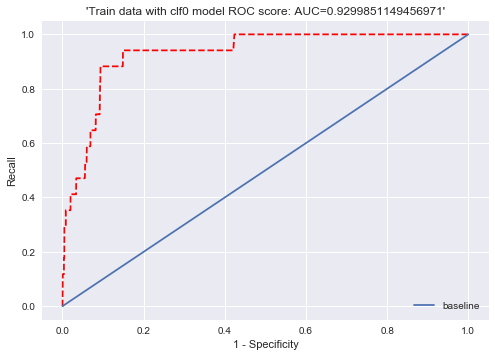

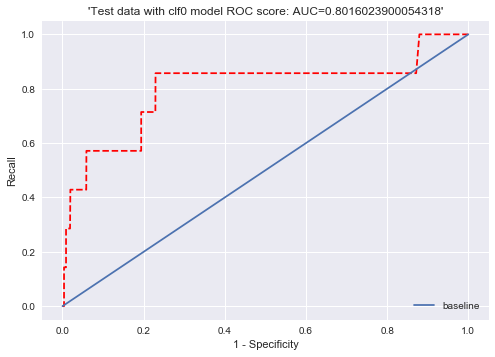

In [33]:
ROC(x_train,y_train,clf0, "Train data with clf0 model")

ROC(x_test,y_test,clf0, "Test data with clf0 model")

In [34]:
ConfusionM(x_train,y_train,clf0, "Train data with clf0 model")

ConfusionM(x_test,y_test,clf0, "Test data with clf0 model")

The confusion Metrics for Train data with clf0 model
               Predicted Negative  Predicted Positive
True Negative                5335                   0
True Positive                  17                   0
Recall: 0.0%
Precision: nan%
The confusion Metrics for Test data with clf0 model
               Predicted Negative  Predicted Positive
True Negative                2624                   6
True Positive                   7                   0
Recall: 0.0%
Precision: 0.0%


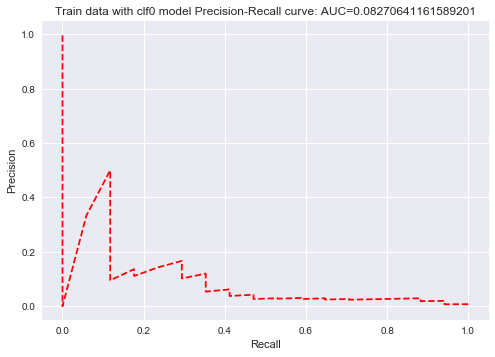

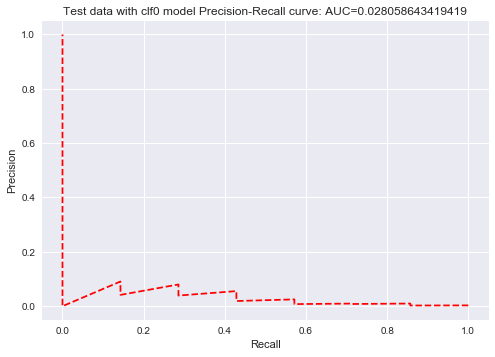

In [35]:
PRC(x_train,y_train,clf0, "Train data with clf0 model")

PRC(x_test,y_test,clf0, "Test data with clf0 model")

## Change a parameter for the model

In [36]:
clf1 = LogisticRegression(class_weight='balanced')
clf1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

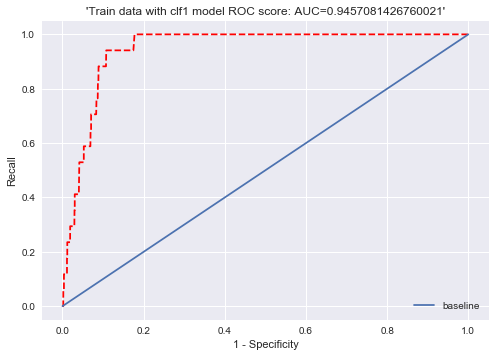

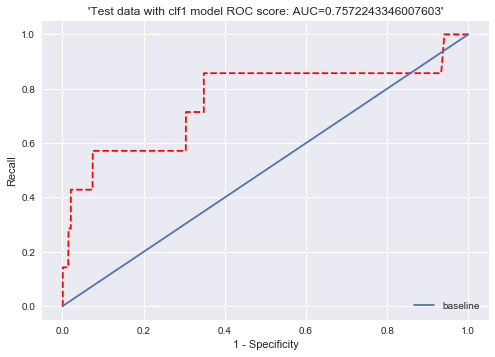

In [37]:
ROC(x_train,y_train,clf1, "Train data with clf1 model")

ROC(x_test,y_test,clf1, "Test data with clf1 model")

In [38]:
ConfusionM(x_train,y_train,clf1, "Train data with clf1 model")

ConfusionM(x_test,y_test,clf1, "Test data with clf1 model")

The confusion Metrics for Train data with clf1 model
               Predicted Negative  Predicted Positive
True Negative                4509                 826
True Positive                   1                  16
Recall: 94.11764705882354%
Precision: 1.9002375296912113%
The confusion Metrics for Test data with clf1 model
               Predicted Negative  Predicted Positive
True Negative                2210                 420
True Positive                   3                   4
Recall: 57.142857142857146%
Precision: 0.9433962264150944%


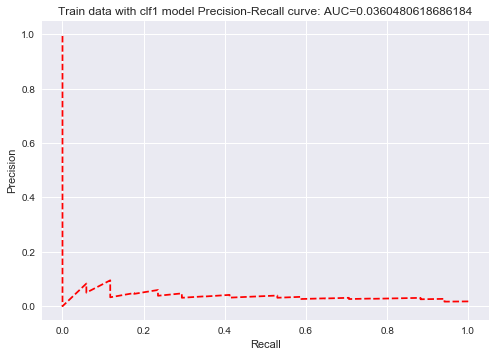

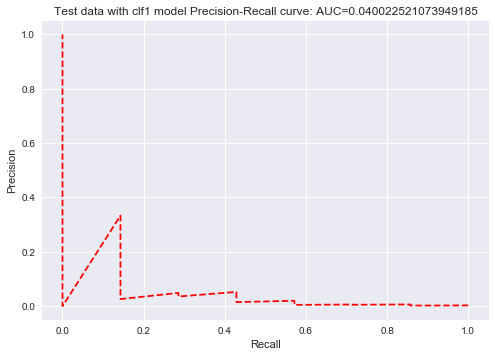

In [39]:
PRC(x_train,y_train,clf1, "Train data with clf1 model")

PRC(x_test,y_test,clf1, "Test data with clf1 model")

## 2.4 Tune model by GridSearch in combination of ROC and PRC scores

###  GridSearch

In [40]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameters by cross-validation
tuned_parameters = [{'penalty': ['l2'], 
                    'C': [1,1e-1,1e-3],
                    'fit_intercept': [True, False], 
                    'class_weight': ['balanced',{0:0.001,1:0.999},{0:0.1,1:0.9},{0:0.01,1:0.99},None],
                    'solver' : ['newton-cg', 'lbfgs', 'liblinear']}, 
                   {'penalty': ['l1'], 
                    'C': [1,1e-1,1e-3],
                    'fit_intercept': [True, False], 
                    'class_weight': ['balanced',{0:0.001,1:0.999},{0:0.1,1:0.9},{0:0.01,1:0.99},None],
                    'solver' : ['liblinear']}]

for tuned_parameter in tuned_parameters:
    clf_roc = GridSearchCV(LogisticRegression(), tuned_parameters, cv=3, scoring='roc_auc')
    clf_roc.fit(x_train, y_train)

    clf_prc = GridSearchCV(LogisticRegression(), tuned_parameters, cv=3, scoring='average_precision')
    clf_prc.fit(x_train, y_train)

/Users/jiepeng/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jiepeng/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### plot the ROC score vs PRC score

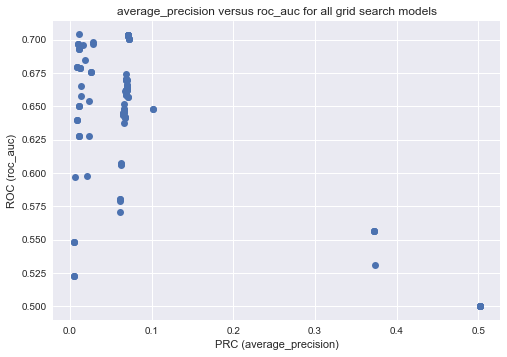

In [41]:
# roc_auc versus average_precision
roc_auc = np.array([i[1] for i in clf_roc.grid_scores_])
prec_ave = np.array([i[1] for i in clf_prc.grid_scores_])
plt.plot(prec_ave,roc_auc,'o')
plt.title('average_precision versus roc_auc for all grid search models')
plt.xlabel('PRC (average_precision)')
plt.ylabel('ROC (roc_auc)')
plt.show()

I want both ROC and PRC scores high

#### Model focus more on PRC

In [42]:
turning_roc = 0
parameters = np.array([i[0] for i in clf_roc.grid_scores_])
best_params =[]
for roc_score,prc_score,params in zip(roc_auc,prec_ave, parameters):
    if roc_score>turning_roc and prc_score>0.09:
        turning_roc = roc_score
        best_params= params

In [43]:
print(best_params)

{'class_weight': 'balanced', 'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear', 'fit_intercept': True}


In [44]:
clf2 =LogisticRegression(penalty='l1', C= 0.001, fit_intercept=True, solver='liblinear', class_weight= 'balanced')
clf2.fit(x_train,y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

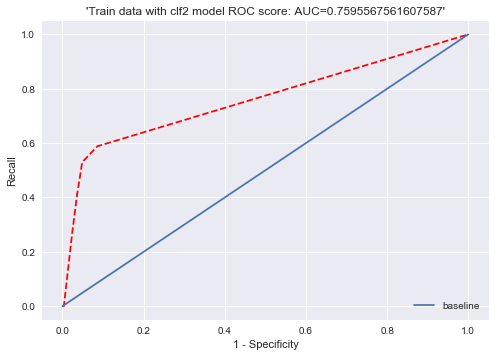

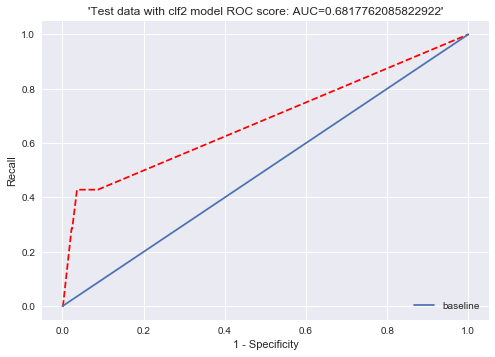

In [45]:
ROC(x_train,y_train,clf2, "Train data with clf2 model")

ROC(x_test,y_test,clf2, "Test data with clf2 model")

In [46]:
ConfusionM(x_train,y_train,clf2, "Train data with clf2 model")

ConfusionM(x_test,y_test,clf2, "Test data with clf2 model")

The confusion Metrics for Train data with clf2 model
               Predicted Negative  Predicted Positive
True Negative                4877                 458
True Positive                   7                  10
Recall: 58.8235294117647%
Precision: 2.1367521367521367%
The confusion Metrics for Test data with clf2 model
               Predicted Negative  Predicted Positive
True Negative                2401                 229
True Positive                   4                   3
Recall: 42.857142857142854%
Precision: 1.293103448275862%


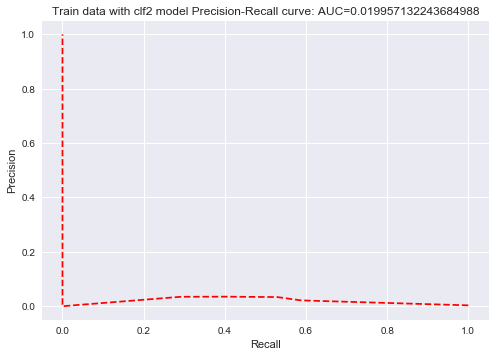

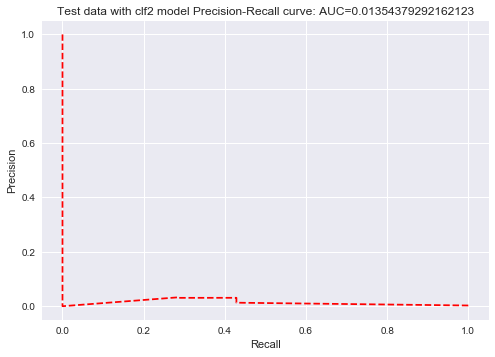

In [47]:
PRC(x_train,y_train,clf2, "Train data with clf2 model")

PRC(x_test,y_test,clf2, "Test data with clf2 model")

#### Model focus more on ROC

In [48]:
turning_roc = 0
parameters = np.array([i[0] for i in clf_roc.grid_scores_])
best_params =[]
for roc_score,prc_score,params in zip(roc_auc,prec_ave, parameters):
    if roc_score>turning_roc and prc_score>0.07:
        turning_roc = roc_score
        best_params= params

In [49]:
print(best_params)

{'class_weight': {0: 0.001, 1: 0.999}, 'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear', 'fit_intercept': True}


In [50]:
clf =LogisticRegression(penalty='l2', C= 0.001, fit_intercept=True, solver='liblinear', class_weight= {0: 0.001, 1: 0.999})
clf.fit(x_train,y_train)

LogisticRegression(C=0.001, class_weight={0: 0.001, 1: 0.999}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

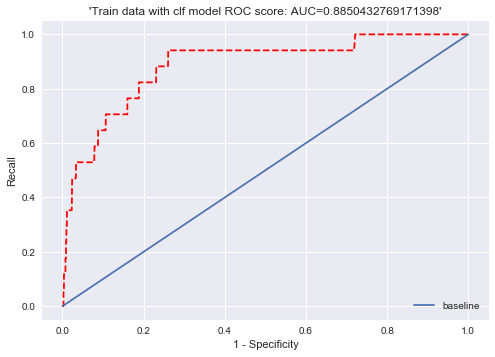

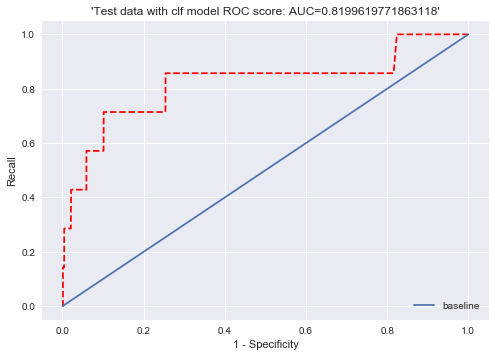

In [51]:
ROC(x_train,y_train,clf, "Train data with clf model")

ROC(x_test,y_test,clf, "Test data with clf model")

In [52]:
ConfusionM(x_train,y_train,clf, "Train data with clf model")

ConfusionM(x_test,y_test,clf, "Test data with clf model")

The confusion Metrics for Train data with clf model
               Predicted Negative  Predicted Positive
True Negative                2687                2648
True Positive                   1                  16
Recall: 94.11764705882354%
Precision: 0.6006006006006006%
The confusion Metrics for Test data with clf model
               Predicted Negative  Predicted Positive
True Negative                1314                1316
True Positive                   1                   6
Recall: 85.71428571428571%
Precision: 0.45385779122541603%


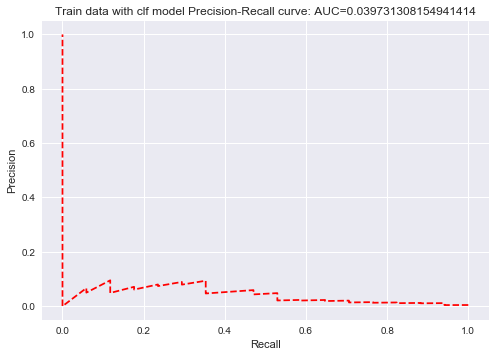

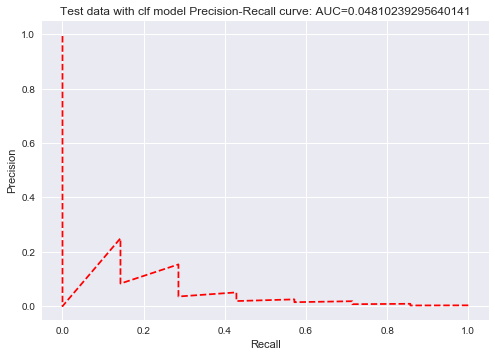

In [53]:
PRC(x_train,y_train,clf, "Train data with clf model")

PRC(x_test,y_test,clf, "Test data with clf model")

### Group the performaces of models

### ROC

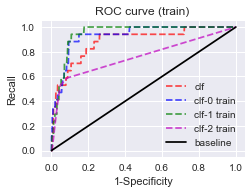

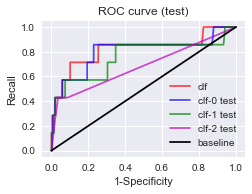

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
roc_train_clf  = roc_curve(y_train,clf.predict_proba(x_train)[:,1])
roc_test_clf   = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
roc_train_clf0 = roc_curve(y_train,clf0.predict_proba(x_train)[:,1])
roc_test_clf0  = roc_curve(y_test, clf0.predict_proba(x_test)[:,1])
roc_train_clf1 = roc_curve(y_train,clf1.predict_proba(x_train)[:,1])
roc_test_clf1  = roc_curve(y_test, clf1.predict_proba(x_test)[:,1])
roc_train_clf2 = roc_curve(y_train,clf2.predict_proba(x_train)[:,1])
roc_test_clf2  = roc_curve(y_test, clf2.predict_proba(x_test)[:,1])

prc_train_clf  = precision_recall_curve(y_train,clf.predict_proba(x_train)[:,1])
prc_test_clf   = precision_recall_curve(y_test,clf.predict_proba(x_test)[:,1])
prc_train_clf0 = precision_recall_curve(y_train,clf0.predict_proba(x_train)[:,1])
prc_test_clf0  = precision_recall_curve(y_test,clf0.predict_proba(x_test)[:,1])
prc_train_clf1 = precision_recall_curve(y_train,clf1.predict_proba(x_train)[:,1])
prc_test_clf1  = precision_recall_curve(y_test,clf1.predict_proba(x_test)[:,1])
prc_train_clf2 = precision_recall_curve(y_train,clf2.predict_proba(x_train)[:,1])
prc_test_clf2  = precision_recall_curve(y_test,clf2.predict_proba(x_test)[:,1])


plt.figure()
plt.subplot(2,2,1)
plt.plot(roc_train_clf[0],roc_train_clf[1],linestyle='--',color='r',label='clf',alpha=0.7)
plt.plot(roc_train_clf0[0],roc_train_clf0[1],linestyle='--',color='b',label='clf-0 train',alpha=0.7)
plt.plot(roc_train_clf1[0],roc_train_clf1[1],linestyle='--',color='g',label='clf-1 train',alpha=0.7)
plt.plot(roc_train_clf2[0],roc_train_clf2[1],linestyle='--',color='m',label='clf-2 train',alpha=0.7)


plt.plot([0,1],[0,1],color='k',label='baseline')

plt.title('ROC curve (train) ')
plt.xlabel('1-Specificity')
plt.ylabel('Recall')
plt.legend(loc=4)
plt.show()

plt.subplot(2,2,2)
plt.plot(roc_test_clf[0],roc_test_clf[1],linestyle='-',color='r',label='clf',alpha=0.7)
plt.plot(roc_test_clf0[0],roc_test_clf0[1],linestyle='-',color='b',label='clf-0 test',alpha=0.7)
plt.plot(roc_test_clf1[0],roc_test_clf1[1],linestyle='-',color='g',label='clf-1 test',alpha=0.7)
plt.plot(roc_test_clf2[0],roc_test_clf2[1],linestyle='-',color='m',label='clf-2 test',alpha=0.7)
plt.plot([0,1],[0,1],color='k',label='baseline')

plt.title('ROC curve (test)')
plt.xlabel('1-Specificity')
plt.ylabel('Recall')
plt.legend(loc=4)
plt.show()

###  PRC

clf-0 PRC score(train data) 0.0827064116159
clf-0 PRC score(test data) 0.0280586434194
clf-1 PRC score(train data) 0.0360480618686
clf-1 PRC score(test data) 0.0400225210739
clf-2 PRC score(train data) 0.0199571322437
clf-2 PRC score(test data) 0.0135437929216
clf-tuned PRC score(train data) 0.0397313081549
clf-tuned PRC score(test data) 0.0481023929564


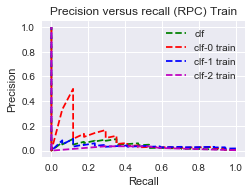

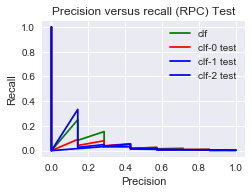

In [55]:
#from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve,average_precision_score
prc_train_clf = precision_recall_curve(y_train,clf.predict_proba(x_train)[:,1])
prc_test_clf= precision_recall_curve(y_test,clf.predict_proba(x_test)[:,1])

prc_train_clf0 = precision_recall_curve(y_train,clf0.predict_proba(x_train)[:,1])
prc_test_clf0= precision_recall_curve(y_test,clf0.predict_proba(x_test)[:,1])

prc_train_clf1 = precision_recall_curve(y_train,clf1.predict_proba(x_train)[:,1])
prc_test_clf1= precision_recall_curve(y_test,clf1.predict_proba(x_test)[:,1])

prc_train_clf2 = precision_recall_curve(y_train,clf2.predict_proba(x_train)[:,1])
prc_test_clf2= precision_recall_curve(y_test,clf2.predict_proba(x_test)[:,1])


print('clf-0 PRC score(train data)',
      average_precision_score(y_train,clf0.predict_proba(x_train)[:,1]))
print('clf-0 PRC score(test data)',
      average_precision_score(y_test,clf0.predict_proba(x_test)[:,1]))

print('clf-1 PRC score(train data)',
      average_precision_score(y_train,clf1.predict_proba(x_train)[:,1]))
print('clf-1 PRC score(test data)',
      average_precision_score(y_test,clf1.predict_proba(x_test)[:,1]))

print('clf-2 PRC score(train data)',
      average_precision_score(y_train,clf2.predict_proba(x_train)[:,1]))
print('clf-2 PRC score(test data)',
      average_precision_score(y_test,clf2.predict_proba(x_test)[:,1]))

print('clf-tuned PRC score(train data)',
      average_precision_score(y_train,clf.predict_proba(x_train)[:,1]))
print('clf-tuned PRC score(test data)',
      average_precision_score(y_test,clf.predict_proba(x_test)[:,1]))


plt.figure()
plt.subplot(2,2,1)
plt.plot(prc_train_clf[1],prc_train_clf[0],linestyle='--',color='g',label='clf')
plt.plot(prc_train_clf0[1],prc_train_clf0[0],linestyle='--',color='r',label='clf-0 train')
plt.plot(prc_train_clf1[1],prc_train_clf1[0],linestyle='--',color='b',label='clf-1 train')
plt.plot(prc_train_clf2[1],prc_train_clf2[0],linestyle='--',color='m',label='clf-2 train')
plt.title('Precision versus recall (RPC) Train')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

plt.subplot(2,2,2)
plt.plot(prc_test_clf[1],prc_test_clf[0],linestyle='-',color='g',label='clf')
plt.plot(prc_test_clf0[1],prc_test_clf0[0],linestyle='-',color='r',label='clf-0 test')
plt.plot(prc_test_clf1[1],prc_test_clf1[0],linestyle='-',color='b',label='clf-1 test')
plt.plot(prc_test_clf2[1],prc_test_clf2[0],linestyle='-',color='b',label='clf-2 test')
plt.title('Precision versus recall (RPC) Test')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.show()

## 2.5 Chose clf as the Final Model and retrain the model with all the data

### Retrain the model with all the data

In [56]:
clf.fit(df_norm,y)
clf_final = precision_recall_curve(y,clf.predict_proba(df_norm)[:,1])

In [57]:
ConfusionM(df_norm,y,clf, "All data with clf model")

The confusion Metrics for All data with clf model
               Predicted Negative  Predicted Positive
True Negative                4476                3489
True Positive                   2                  22
Recall: 91.66666666666667%
Precision: 0.6266021076616348%


## 3 Decision boundary

We can modulate the decision boundary to control the precision and recall

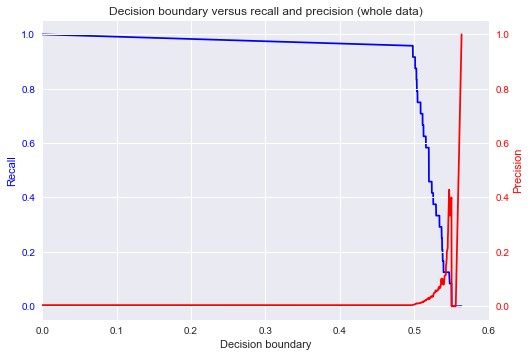

In [58]:
ax1 = plt.subplot()
t = [0]+list(clf_final[2])
leftlim,rightlim = min(t),max(t)

s1 = clf_final[1]
ax1.plot(t, s1, 'b')
ax1.set_xlabel('Decision boundary')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Recall', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
ax2 = ax1.twinx()
s2 = clf_final[0]
ax2.plot(t, s2, 'r')
plt.xlim([0,0.6])
ax2.set_ylabel('Precision', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.title('Decision boundary versus recall and precision (whole data)')
plt.show()

### 3.1 Decision boundary and Net Profit

#### Different decision boudnary relates to the accuracy and precision to capture Ad clicks.  And how to chose decision boundary affects the Net Profit for business. 


\begin{equation*}
\text{Net Profit} =
\text{Gross Profit -  Cost}
\end{equation*}

##### The Gross Profit can be calculated by 
\begin{equation*}
\text{Gross Profit} =
\text{Per Click Profit} \times \text{Clicks}
\end{equation*}
##### where
\begin{equation*}
\text{Clicks} =
\text{Total Possible Clicks} \times \text{Recall}
\end{equation*}
##### and
\begin{equation*}
\text{Total Possible Clicks} =
\text{Total Possible Ads} \times \text{pcc%}
\end{equation*}

##### The Cost can be calculated by 
\begin{equation*}
\text{Cost} =
\text{Per Ad Cost} \times \text{Total Ads Shown}
\end{equation*}
##### where
\begin{equation*}
\text{Total Ads Shown} =
\frac{\text{Clicks} }{\text{Precision}}
\end{equation*}

##### Thus the Net Profit can be expressed as 
\begin{equation*}
\text{Net Profit} =
\text{Per Click Profit} \times \text{Total Possible Ads} \times \text{pcc%} \times \text{Recall} \\ -\, 
\text{Per Ad Cost} \times
\frac{\text{Total Possible Ads} \times \text{pcc%} \times \text{Recall}}{\text{Precision}}
\end{equation*}

##### Given 1million opportunities to show ads, then we can express the Net Profit as
\begin{equation*}
\text{Net Profit} =
\text{1 million} \times \text{pcc%} \times \text{Recall} \times( \text{Per Click Profit} -\,\frac{\text{Per Ad Cost}}{\text{Precision}})
\end{equation*}

##### Further transform to 
\begin{equation*}
\frac{\text{Net Profit}}{\text{Per Ad Cost}} =
\text{1 million} \times \text{pcc%} \times \text{Recall} \times( \frac{\text{Per Click Profit}}{\text{Per Ad Cost}} -\,\frac{\text{1}}{\text{Precision}})
\end{equation*}

##### Assume the Per Ad Cost is at a unit 1, then Net Profit is related to the ratio of Per Click Profit to Per Ad Cost. 

##### Based on the above discussion, the decision boundary selection should be conditioned on Per Click Profit to Per Ad Cost ratio


#### 1. Per Click Profit to Per Ad Cost ratio is 1:1

In this situation, Net Profit will never be positive given any decision boundary.

#### 2. Below I will explore the decision boundary selection at a Per Click Profit to Per Ad Cost ratio of 10:1, 100:1 and 1000:1

In [59]:
clf_final0 = pd.DataFrame(clf_final[0])
clf_final1 = pd.DataFrame(clf_final[1])
clf_final2 = pd.DataFrame(clf_final[2])

clf_final = pd.concat([clf_final0, clf_final1, clf_final2], 1)
clf_final.columns=['Precision', 'Recall', 'Decision_boundary']

In [60]:
# Calulate the Net Profit at different Per Click Profit vs Per Ad Cost ratio
clf_final['Ratio 10:1'] = 1000000*(24/7989)*clf_final['Recall']*(10-1/clf_final['Precision'])
clf_final['Ratio 100:1'] = 1000000*(24/7989)*clf_final['Recall']*(100-1/clf_final['Precision'])
clf_final['Ratio 1000:1'] = 1000000*(24/7989)*clf_final['Recall']*(1000-1/clf_final['Precision'])

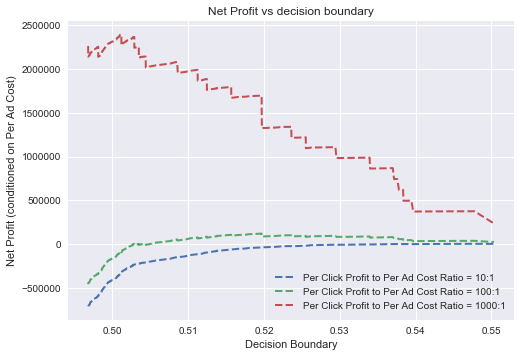

In [61]:
fig, ax = plt.subplots()
line1, = ax.plot(clf_final['Decision_boundary'], clf_final['Ratio 10:1'], '--', linewidth=2,
                 label='Per Click Profit to Per Ad Cost Ratio = 10:1')
#line1.set_dashes(dashes)

line2, = ax.plot(clf_final['Decision_boundary'], clf_final['Ratio 100:1'], '--', linewidth=2,
                 label='Per Click Profit to Per Ad Cost Ratio = 100:1')


line3, = ax.plot(clf_final['Decision_boundary'], clf_final['Ratio 1000:1'],'--', linewidth=2,
                 label='Per Click Profit to Per Ad Cost Ratio = 1000:1')

ax.legend(loc='lower right')
plt.xlabel('Decision Boundary')
plt.ylabel('Net Profit (conditioned on Per Ad Cost)')
plt.title('Net Profit vs decision boundary')
plt.show()

In [62]:
print('To maximize the Net Profit')
print('\n')
print('At Per Click Profit vs Per Ad Cost ratio is 10:1 \n the decision boundary should be {:.4f} and the Net Profit is {:.0f}'.format(clf_final['Decision_boundary'].loc[clf_final['Ratio 10:1'].idxmax()], clf_final['Ratio 10:1'].loc[clf_final['Ratio 10:1'].idxmax()]))
print('\n')
print('At Per Click Profit vs Per Ad Cost ratio is 100:1 \n the decision boundary should be {:.4f} and the Net Profit is {:.0f}'.format(clf_final['Decision_boundary'].loc[clf_final['Ratio 100:1'].idxmax()], clf_final['Ratio 100:1'].loc[clf_final['Ratio 10:1'].idxmax()]))
print('\n')
print('At Per Click Profit vs Per Ad Cost ratio is 1000:1 \n the decision boundary should be {:.4f} and the Net Profit is {:.0f}'.format(clf_final['Decision_boundary'].loc[clf_final['Ratio 1000:1'].idxmax()], clf_final['Ratio 1000:1'].loc[clf_final['Ratio 10:1'].idxmax()]))


To maximize the Net Profit


At Per Click Profit vs Per Ad Cost ratio is 10:1 
 the decision boundary should be 0.5478 and the Net Profit is 2879


At Per Click Profit vs Per Ad Cost ratio is 100:1 
 the decision boundary should be 0.5197 and the Net Profit is 36675


At Per Click Profit vs Per Ad Cost ratio is 1000:1 
 the decision boundary should be 0.5012 and the Net Profit is 374640
